# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir(r'D:\STUDY\content\Andrew Ng\machine-learning-ex2\ex2')


# Loading data

In [2]:
data = pd.read_table("ex2data1.txt",sep=',',names=["Test 1","Test 2","Result"])
data.head()
                     

Test 1     Test 2  Result
0  34.623660  78.024693       0
1  30.286711  43.894998       0
2  35.847409  72.902198       0
3  60.182599  86.308552       1
4  79.032736  75.344376       1

In [3]:
data.shape

(100, 3)

In [4]:
data.describe()

Test 1      Test 2      Result
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Test 1    100 non-null float64
Test 2    100 non-null float64
Result    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
data.corr()

Test 1    Test 2    Result
Test 1  1.000000 -0.023665  0.574057
Test 2 -0.023665  1.000000  0.512323
Result  0.574057  0.512323  1.000000

# Visualizing the data

In [7]:
Pass = data[data["Result"]==1]
Pass.head(10)

Test 1     Test 2  Result
3   60.182599  86.308552       1
4   79.032736  75.344376       1
6   61.106665  96.511426       1
7   75.024746  46.554014       1
8   76.098787  87.420570       1
9   84.432820  43.533393       1
12  82.307053  76.481963       1
13  69.364589  97.718692       1
15  53.971052  89.207350       1
16  69.070144  52.740470       1

In [8]:
Fail = data[data["Result"]==0]
Fail.head(10)

Test 1     Test 2  Result
0   34.623660  78.024693       0
1   30.286711  43.894998       0
2   35.847409  72.902198       0
5   45.083277  56.316372       0
10  95.861555  38.225278       0
11  75.013658  30.603263       0
14  39.538339  76.036811       0
17  67.946855  46.678574       0
20  67.372028  42.838438       0
22  50.534788  48.855812       0

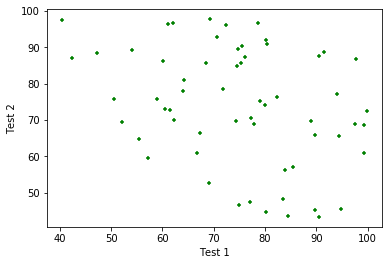

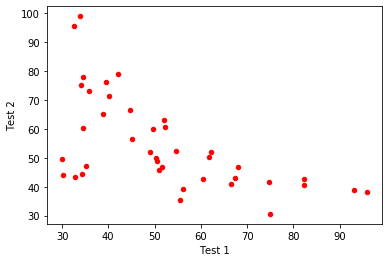

In [9]:
%matplotlib inline
Pass.plot(kind="scatter",x="Test 1", y="Test 2", marker = "+" , c="green")
Fail.plot(kind="scatter", x="Test 1", y="Test 2", marker = "o" , c="red")
# using pandas plotting function

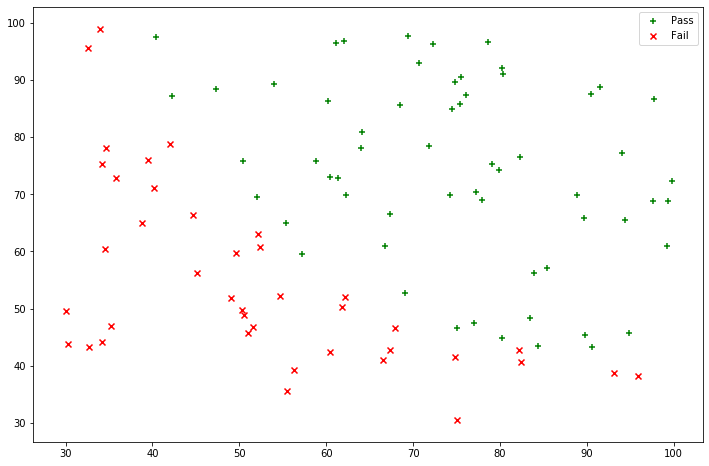

In [10]:
%matplotlib inline
plt.figure(figsize=(12,8))
plt.scatter(Pass["Test 1"], Pass["Test 2"], marker="+" , c="green", label="Pass")
plt.scatter(Fail["Test 1"], Fail["Test 2"], marker="x", c="red", label="Fail")
plt.legend()
plt.show()

# Preparing Model functions


In [11]:
data.insert(0,"Ones",1) 
# inserting ones in  as first column ; these are to be multiplied by bias term in each iteration of GD
X = np.matrix(data.loc[:,["Ones","Test 1", "Test 2"]])
Y = np.matrix(data.loc[:,"Result"])
# converting pandas dataframe object to numpy matrices for faster calculations
parameters = np.matrix(np.zeros(3))
# setting inital values of the parameters as zero (3 -> bias , theata_1, theta_2)
X.shape , Y.shape , parameters.shape

((100, 3), (1, 100), (1, 3))

In [12]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g


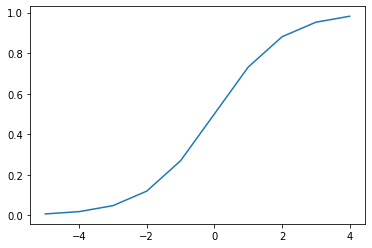

In [13]:
%matplotlib inline  
# checking the sigmoid function
r = [x for x in range(-5,5,1)]
s = list(map(sigmoid,r))
plt.plot(r,s)

In [14]:
def CostFunction(X,y,theta):
    z = X * theta.T # 100x3 * 3x1 = 100x1
    h = sigmoid(z)
    m = len(X)
    J = (y * np.log(h)) + ((1-y) * np.log((1-h))) 
    J /= -m
    return J

In [15]:
CostFunction(X,Y,parameters) # cost at initial parameter i.e zeros

matrix([[0.69314718]])

In [16]:
def GradientDescent(X,y,theta,num_iters,alpha,cost_flag=0):
    m = len(X)
    costs = np.zeros(num_iters)
    for iteration in range(num_iters):
        h = sigmoid(theta * X.T)  
        # (1x3) * (3x100) = 1 X 100
        gradients = ( h - y ) * X  
        # h - y => (1x100) - (1x100) = 1 X 100
        # ( h - y ) * X  = (1x100) * (100,3) = 1 X 3 i.e the shape of parameters variable
        theta = theta - (alpha/m)*gradients
        costs[iteration]= CostFunction(X,y,theta)
    if cost_flag:
        return theta , costs
    else:
        return theta

# Training the Model

In [17]:
learning_rates , params , cost = [0.0005,0.0008,0.001,0.002,0.003,0.004], [] ,[]
for i in learning_rates:
    param = GradientDescent(X,Y,parameters,100000,i)
    params.append(param)
    cost.append(CostFunction(X,Y,param))  
   


In [18]:
for i in range(len(cost)):
    print(learning_rates[i],end=" --->  ")
    print(params[i][0],end=" ---> ")
    print(cost[i])

0.0005 --->  [[-2.84945317  0.03070162  0.02275943]] ---> [[0.465105]]
0.0008 --->  [[-4.10226732  0.03995537  0.03261016]] ---> [[0.41259461]]
0.001 --->  [[-4.81180027  0.04528064  0.03819149]] ---> [[0.38738952]]
0.002 --->  [[-9.31279297  0.0724311   0.06333851]] ---> [[0.3801507]]
0.003 --->  [[-14.24387826   0.10793226   0.09103435]] ---> [[0.48073779]]
0.004 --->  [[-19.20860596   0.21282963   0.18782522]] ---> [[1.1031628]]


For 1,00,000 iterations of gradient descent,the cost is least (not optimally minimum)  when the learning rate is 0.001

therefore, choosen parameters for our model are :
theta_0 = -4.811 , theta_1 = 0.0452 , theta_2 = 0.03819

In [19]:
optimal_parameters , costs = GradientDescent(X,Y,parameters,100000,0.001,cost_flag=1)
optimal_parameters , costs[-1]

(matrix([[-4.81180027,  0.04528064,  0.03819149]]), 0.3873895227111881)

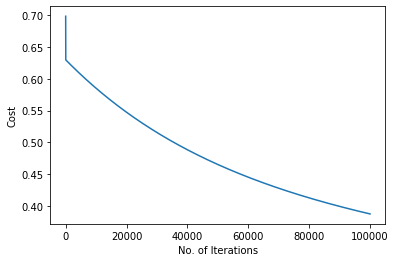

In [20]:
%matplotlib inline
plt.plot(np.arange(100000),costs)
plt.xlabel("No. of Iterations")
plt.ylabel("Cost")
plt.show()

# Plotting Decision Boundary

 P(y=1|x) = P(y=0|x) = 1/2

=>  1 / (1 + e^(-theta.T * X)) = 1/2

for this to hold true , e^(-theta.T * X)) should be equal to zero -> e^0 = 1 ; 1/(1+1) = 1/2

S0 , e^(-theta.T * X)) = 0

=> theta_0 + theata_1 * x1 + theta_2 * x2 = 0 (considering binary case)

=>  x_2 = -(theta_0 + theta_1*x1) / theta_2

=>  y_axis = x_2 = decision boundary

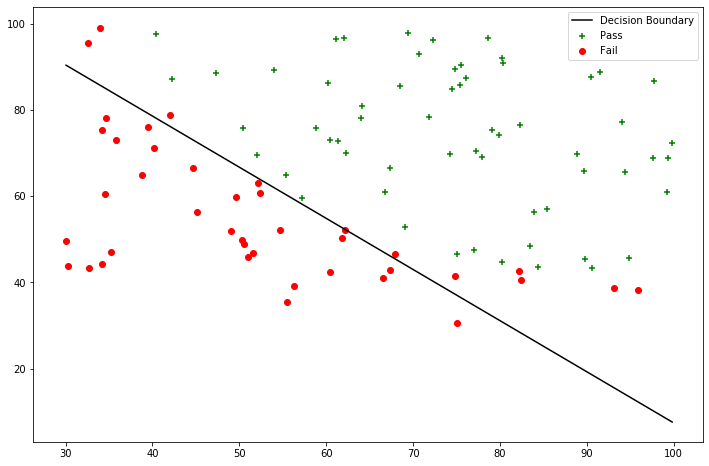

In [21]:
x_axis = np.array([data["Test 1"].max(), data["Test 1"].min()])
decision_boundary = -(optimal_parameters.item(0) + optimal_parameters.item(1)*x_axis) / optimal_parameters.item(2)
%matplotlib inline
plt.figure(figsize=(12,8))
plt.scatter(Pass["Test 1"], Pass["Test 2"], marker="+" , c="green", label="Pass")
plt.scatter(Fail["Test 1"], Fail["Test 2"], marker="o", c="red", label="Fail")
plt.plot(x_axis,decision_boundary,c="black",label="Decision Boundary")
plt.legend()
plt.show()

# Making Predictions

In [22]:
def predict(X,theta):
    h = sigmoid(X*theta.T)
    class_ = [0 if x<=0.5 else 1 for x in h]
    return h,class_

In [23]:
probabilities , predictions = predict(X,optimal_parameters)

In [24]:
correct_predictions = [1 if (pred==1 and actual==1) or (pred==0 and actual==0) else 0 for pred,actual in list(zip(predictions,Y.tolist()[0]))]
accuracy = np.mean(correct_predictions)*100
print("ACCURACY = ",accuracy,"%")

ACCURACY =  91.0 %


# How to check predict for a single sample?

In [25]:
predict(np.matrix([1,45,85]),optimal_parameters)

(matrix([[0.615882]]), [1])

# Using scikitlearn

In [26]:
import sklearn 
from sklearn.linear_model import LogisticRegression

In [27]:
Y_train = np.array(data.loc[:,['Result']]).ravel()
type(Y_train) , Y_train.ravel().shape

(numpy.ndarray, (100,))

In [28]:
model = LogisticRegression(max_iter=1000)
model = model.fit(X,Y_train)

In [29]:
model.score(X,Y_train)

0.89

In [32]:
y_pred = model.predict(X)

In [33]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [34]:
accuracy_score(Y_train, y_pred)

0.89

In [35]:
precision_score(Y_train, y_pred)

0.9016393442622951

In [36]:
recall_score(Y_train, y_pred)

0.9166666666666666

 *A very high recall means the model correctly classifies almost every positive sample. (we can see this in the decision boundary plot that all positive class labels are in the left of the bpundary.)*